<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/ReadMatDatafile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Read MAT File from TROIKA Database with data including 1 ECG, 2 PPGs, and x,y,z accelarted signal 

In [1]:
import os

path = 'drive/Shareddrives/AIOT_LAB_DOCS/Data/'

In [2]:
cd drive/Shareddrives/AIOT_LAB_DOCS/Data/

/content/drive/Shareddrives/AIOT_LAB_DOCS/Data


In [46]:
!ls

drive  sample_data


# Read mat file

In [3]:
import scipy.io as sio

mat = sio.loadmat('DATA_01_TYPE01.mat')
BPmat = sio.loadmat('DATA_01_TYPE01_BPMtrace.mat')
data = mat['sig']

In [26]:
import pandas as pd

df = pd.DataFrame(data)
df = df.T # Transpose data to column
df.head(7)
### The first row is ECG data
### The two next rows are PPG Data
### The last row is accerlerate data x , y , z
### Sampling rate is 125 Hz

,0,1,2,3,4,5
0,-269.5,-23.0,4.0,-0.0702,0.3432,0.9594
1,-267.5,-24.0,6.0,-0.0702,0.3588,0.9438
2,-267.5,-26.5,3.0,-0.0546,0.3666,0.9360
3,-265.5,-27.0,3.5,-0.0468,0.3666,0.9360
4,-262.0,-30.0,0.0,-0.0468,0.3744,0.9126
5,-268.5,-30.0,2.0,-0.0468,0.3900,0.9126
6,-275.5,-28.5,3.0,-0.0468,0.4056,0.9282


### Ploting ECG and PPGs 

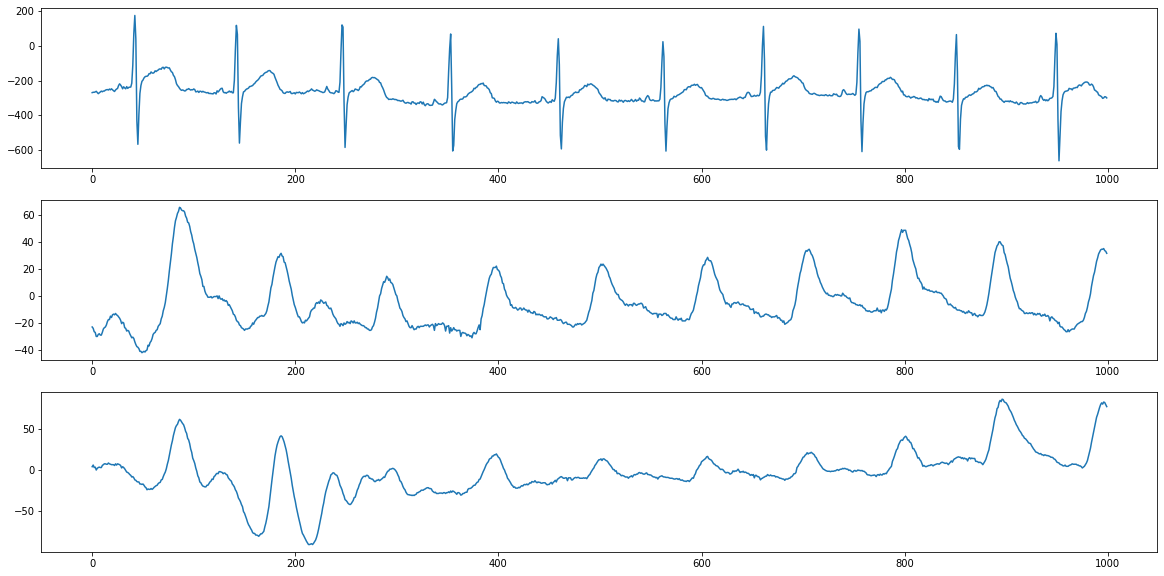

In [27]:
import matplotlib.pyplot as plt
L1, L2 = 0000, 1000
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(df[0][L1:L2])
plt.subplot(312)
plt.plot(df[1][L1:L2])
plt.subplot(313)
plt.plot(df[2][L1:L2])


### HR ploting for sample data

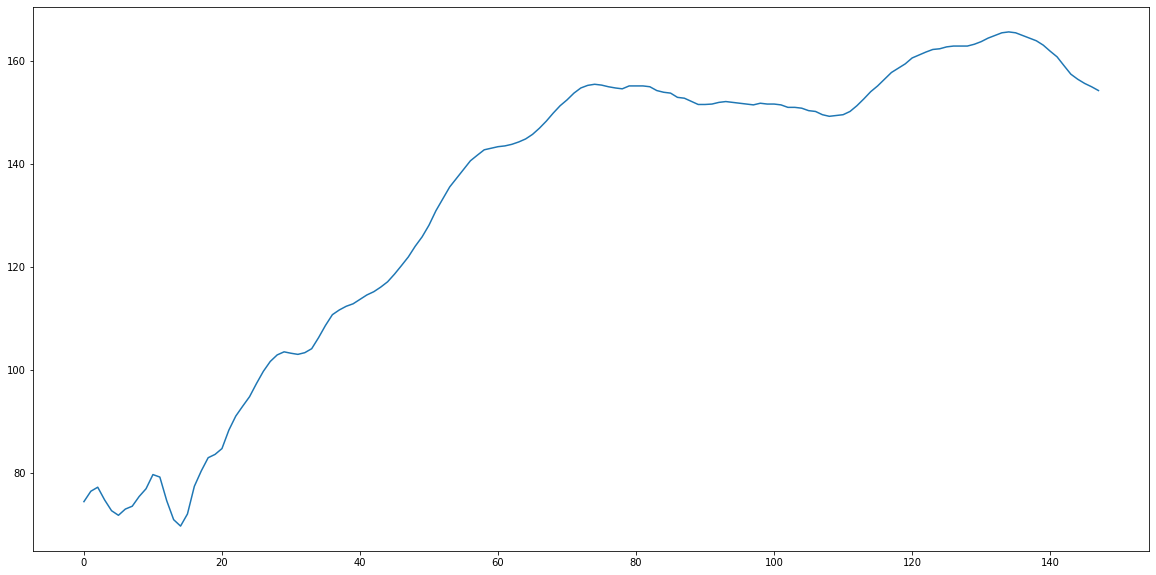

In [8]:
plt.figure(figsize=(20,10))
plt.plot(HR)

In [7]:
import numpy as np

HR = BPmat['BPM0']

### Read all file mat

In [11]:
files = os.listdir('/content/'+path)
files

['DATA_02_TYPE02_BPMtrace.mat',
 'DATA_03_TYPE02_BPMtrace.mat',
 'DATA_04_TYPE02_BPMtrace.mat',
 'DATA_05_TYPE02_BPMtrace.mat',
 'DATA_06_TYPE02_BPMtrace.mat',
 'DATA_07_TYPE02_BPMtrace.mat',
 'DATA_08_TYPE02_BPMtrace.mat',
 'DATA_10_TYPE02_BPMtrace.mat',
 'DATA_09_TYPE02_BPMtrace.mat',
 'DATA_11_TYPE02_BPMtrace.mat',
 'DATA_01_TYPE01_BPMtrace.mat',
 'DATA_12_TYPE02_BPMtrace.mat',
 'DATA_04_TYPE02.mat',
 'DATA_05_TYPE02.mat',
 'DATA_01_TYPE01.mat',
 'DATA_06_TYPE02.mat',
 'DATA_03_TYPE02.mat',
 'DATA_11_TYPE02.mat',
 'DATA_12_TYPE02.mat',
 'DATA_07_TYPE02.mat',
 'DATA_02_TYPE02.mat',
 'DATA_08_TYPE02.mat',
 'DATA_10_TYPE02.mat',
 'DATA_09_TYPE02.mat']

In [25]:
directory = ['TrainSubj'+str(i) for i in range(1,13)]
parent_path = os.path.abspath(os.getcwd()) # Get present path directory
for dir in directory:
  tagPath = os.path.join(parent_path, dir)
  os.makedirs(tagPath)

### Read into a pandas file 

In [442]:
import pandas as pd
from pathlib import Path

import scipy.io as sio
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Xscaled = scaler.fit_transform(dfs[1])

def read_folder(mat_folder):
    ''' Input is a folder with csv files; return list of data frames.'''
    mat_folder = Path(mat_folder).absolute()
    mat_files = [f for f in mat_folder.iterdir() if f.name.endswith('mat') and not('BPMtrace' in f.name)]
    #data = scaler.fit_transform(sio.loadmat(csv_file)['sig'])
    # the assign() method adds a helper column rating
    dfs = [
        
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(rating_src = f'rating-{idx}')#assin a name rating to the column
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(Subject = f'{idx}')
        pd.DataFrame(scaler.fit_transform(pd.DataFrame(sio.loadmat(mat_file)['sig']).T)).assign(Subject = f'{idx-1}') # sclaing [0,1] and then convert to dataframe
        for idx, mat_file in enumerate(mat_files, 1)
    ]
    return mat_files, dfs

In [443]:
mat_files, dfs = read_folder(parent_path)

In [446]:
dfs[11].iloc[:100]

,0,1,2,3,4,5,Subject
0,0.484355,0.526758,0.644993,0.708171,0.185008,0.656992,11
1,0.488527,0.526758,0.641743,0.708171,0.185008,0.659631,11
2,0.494368,0.524465,0.635891,0.712062,0.185008,0.656992,11
3,0.493951,0.520642,0.626788,0.712062,0.185008,0.659631,11
4,0.499374,0.512232,0.618986,0.712062,0.188198,0.656992,11
...,...,...,...,...,...,...,...
95,0.523154,0.508410,0.606632,0.638132,0.223285,0.680739,11
96,0.523154,0.497706,0.594278,0.626459,0.228070,0.688654,11
97,0.517730,0.490061,0.583875,0.634241,0.226475,0.688654,11
98,0.518565,0.479358,0.572172,0.630350,0.226475,0.688654,11


In [408]:
np.shape(dfs[0])[0]

37250

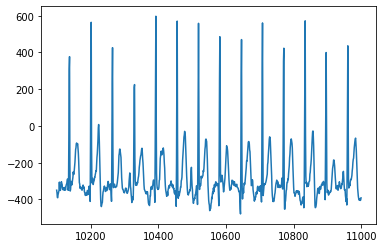

In [91]:
plt.plot(dfs[0][0].iloc[10100:11000])

### Split 12 subject data into N segment with length 1000

In [409]:
def segment(dataframe, dis=1000):
  a= []
  for df in dataframe:
    N = np.shape(df)[0]
    temp = [df.iloc[(i*dis):((i+1)*dis)] for i in range(0,int(N/dis))]
    for ele in temp:
      a.append(ele)
  return a



In [410]:
dfseg = segment(dfs)

(446, 1000, 7)


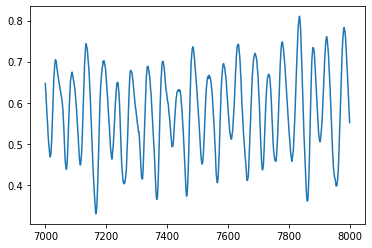

In [411]:
print(np.shape(dfseg))
plt.plot(dfseg[300][2])

###save datafile

In [412]:
import pickle
with open('dataset.pickle', 'wb') as f:
    pickle.dump([dfs, dfseg], f)

### Load data

In [413]:
with open('dataset.pickle', 'rb') as f:
    dfs, dfseg = pickle.load(f)

##Build Machine Learning Model 

In [435]:
import tensorflow as tf
dis=1000
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv1D(filters=32, kernel_size=30, kernel_initializer='lecun_normal', activation='selu', input_shape=(dis, 1)),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Dropout(0.5),
    # The second convolution
    tf.keras.layers.Conv1D(filters=32, kernel_size=50, kernel_initializer='lecun_normal', activation='selu'),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Flatten(),
    # The third convolution
    tf.keras.layers.LSTM(units = 128, return_sequences = True, activation='tanh', recurrent_dropout=0.1),
    # The fourth convolution
    tf.keras.layers.LSTM(units = 128, return_sequences = True, activation='tanh', recurrent_dropout=0.1),
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(12, activation='softmax'),
    
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    #tf.keras.layers.Dense(1, activation='sigmoid')
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(48, activation='relu'),                                  
    tf.keras.layers.Dense(12, activation='softmax')
  
  ])

In [436]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [437]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_44 (Conv1D)           (None, 971, 32)           992       
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 242, 32)           0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 242, 32)           0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 193, 32)           51232     
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 48, 32)            0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 48, 32)            0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 48, 128)         

In [279]:
int(dfseg[0]['Subject'][0])

1

### Make X, y data

In [421]:
X = []
y = []
for seg in dfseg:
  X.append(seg[1].values) # PPG 1
  X.append(seg[2].values) # PPG 2
  y.append(int(seg['Subject'].values[0])) # Label for subject n PPG1
  y.append(int(seg['Subject'].values[0])) # Label for subject n PPG2


  #print(seg['Subject'][0])
X = np.array(X) 
y = np.asarray(y)

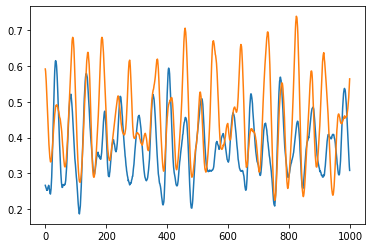

In [309]:
plt.plot(X[100])
plt.plot(X[101])

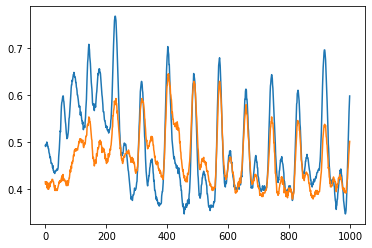

In [364]:
plt.plot(X[2])
plt.plot(X[3])

In [367]:
np.shape(X_train), np.shape(y_train), type(y_train)

((624, 1000, 1), (624,), numpy.ndarray)

In [425]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
y_train = to_categorical(y_train, num_classes=12)
y_test = to_categorical(y_test, num_classes= 12)

In [ ]:
y1 = [10]*10;
y2 = [-1]*10;

y1 = np.asarray(y1)
y2 = np.asarray(y2)
a=np.concatenate((y1,y2))
type(a), type(y)
y

In [424]:
a =to_categorical(y, num_classes=12)
a

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### Check group of Data

In [418]:
pd.DataFrame(y_train).groupby(0)[0].count()

0
1     48
2     54
3     55
4     52
5     53
6     51
7     54
8     47
9     47
10    57
11    56
12    50
Name: 0, dtype: int64

In [438]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=25, verbose=1)

Epoch 1/100
25/25 [==============================] - 14s 358ms/step - loss: 2.5789 - accuracy: 0.0849 - val_loss: 2.4956 - val_accuracy: 0.0970
Epoch 2/100
25/25 [==============================] - 8s 325ms/step - loss: 2.4920 - accuracy: 0.1058 - val_loss: 2.4694 - val_accuracy: 0.2015
Epoch 3/100
25/25 [==============================] - 8s 326ms/step - loss: 2.4983 - accuracy: 0.0994 - val_loss: 2.6875 - val_accuracy: 0.0858
Epoch 4/100
25/25 [==============================] - 8s 328ms/step - loss: 2.4228 - accuracy: 0.1554 - val_loss: 2.5223 - val_accuracy: 0.0746
Epoch 5/100
25/25 [==============================] - 8s 328ms/step - loss: 2.3360 - accuracy: 0.1378 - val_loss: 4.3623 - val_accuracy: 0.0858
Epoch 6/100
25/25 [==============================] - 8s 328ms/step - loss: 2.2988 - accuracy: 0.1603 - val_loss: 2.9892 - val_accuracy: 0.0746
Epoch 7/100
25/25 [==============================] - 8s 326ms/step - loss: 2.2621 - accuracy: 0.1779 - val_loss: 3.6651 - val_accuracy: 0.085

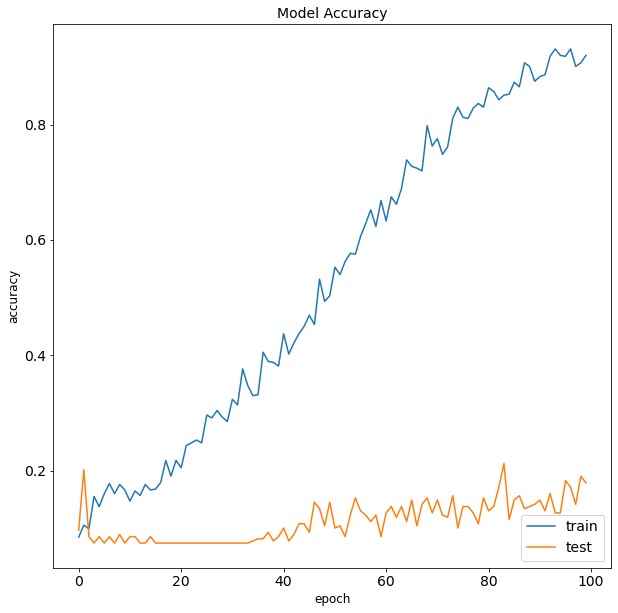

In [441]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
#plt.rcParams.update({'font.size': 22})
SMALL_SIZE = 14
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
#ax.yaxis.set_major_locator(MaxNLocator(5)) 
ax.xaxis.set_major_locator(MaxNLocator(6))
# summarize history for accuracy
ax.plot(history.history['accuracy'],'-')
ax.plot(history.history['val_accuracy'],'-')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
ax.legend(['train', 'test'], loc='lower right')
plt.show()